In [43]:
#installing the NLTK Package
!pip install nltk

In [44]:
import nltk

In [45]:
import pandas as pd
import numpy as np

In [46]:
email_data = pd.read_csv("SMSSpamCollection.tsv" ,sep="\t", header=None)
email_data.columns = ["output" , "email_message"]
email_data.head()

,output,email_message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [47]:
#Printing the shape of our dataset
print(np.shape(email_data))

(5568, 2)


In [48]:
#spam messages are as follows
email_data[email_data["output"] == "spam"]

,output,email_message
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
6,spam,WINNER!! As a valued network customer you have...
7,spam,Had your mobile 11 months or more? U R entitle...
9,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
10,spam,URGENT! You have won a 1 week FREE membership ...
...,...,...
5533,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5536,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5543,spam,Had your contract mobile 11 Mnths? Latest Moto...
5562,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [49]:
#Ham messages are as follows
email_data[email_data["output"] == "ham"]

,output,email_message
0,ham,I've been searching for the right words to tha...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
5,ham,As per your request 'Melle Melle (Oru Minnamin...
...,...,...
5561,ham,Huh y lei...
5564,ham,Will ü b going to esplanade fr home?
5565,ham,"Pity, * was in mood for that. So...any other s..."
5566,ham,The guy did some bitching but I acted like i'd...


In [50]:
#Total number of null values in label is 
email_data["output"].isnull().sum()

0

In [51]:
#Total number of null values in body_text is 
email_data["email_message"].isnull().sum()

0

In [52]:
#Data Preprocessing 
#1. Removing all the punctuations from the sentences 
import string
def remove_punctuation(data):
    no_punc = "".join([char for char in data if char not in string.punctuation])
    return no_punc

In [53]:
email_data["email_message_clean"] = email_data["email_message"].apply(lambda x:remove_punctuation(x))
email_data

,output,email_message,email_message_clean
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL
...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...
5564,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home
5565,ham,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...
5566,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...


In [54]:
import re

In [55]:
#2. Tokenization 
def tokenizing(data):
    token = re.split('\W' , data)
    return token

In [56]:
email_data["email_message_tokenized"] = email_data["email_message_clean"].apply(lambda x:tokenizing(x.lower()))
email_data

,output,email_message,email_message_clean,email_message_tokenized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"
...,...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,..."
5564,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home,"[will, ü, b, going, to, esplanade, fr, home]"
5565,ham,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, , was, in, mood, for, that, soany, othe..."
5566,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,..."


In [57]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gokul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
#3. Removing stopwords
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(listm):
    nostopword = [word for word in listm if word not in stopwords]
    return nostopword

email_data["email_message_nostop"] = email_data["email_message_tokenized"].apply(lambda x:remove_stopwords(x))
email_data.head(5)

,output,email_message,email_message_clean,email_message_tokenized,email_message_nostop
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


In [60]:
#4. Stemming 
pr_stem = nltk.PorterStemmer()

def stem_data(listmm):
    stemmed_word = [pr_stem.stem(word) for word in listmm]
    return stemmed_word

email_data["email_message_stemmed"] = email_data["email_message_nostop"].apply(lambda x:stem_data(x))
email_data

,output,email_message,email_message_clean,email_message_tokenized,email_message_nostop,email_message_stemmed
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"
...,...,...,...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, , 750, po...","[2nd, time, tri, 2, contact, u, u, , 750, poun..."
5564,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home,"[will, ü, b, going, to, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]","[ü, b, go, esplanad, fr, home]"
5565,ham,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, , was, in, mood, for, that, soany, othe...","[pity, , mood, soany, suggestions]","[piti, , mood, soani, suggest]"
5566,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som..."


In [20]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gokul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gokul\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [21]:
#5. Lemmatizing
wn_lemmatizer = nltk.WordNetLemmatizer()

def lemitize_data(tokenized_text):
    text = [wn_lemmatizer.lemmatize(word) for word in tokenized_text]
    return text

email_data["email_message_lematized"] = email_data["email_message_nostop"].apply(lambda x:lemitize_data(x))
email_data

,output,email_message,email_message_clean,email_message_tokenized,email_message_nostop,email_message_stemmed,email_message_lematized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"
...,...,...,...,...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, , 750, po...","[2nd, time, tri, 2, contact, u, u, , 750, poun...","[2nd, time, tried, 2, contact, u, u, , 750, po..."
5564,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home,"[will, ü, b, going, to, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]","[ü, b, go, esplanad, fr, home]","[ü, b, going, esplanade, fr, home]"
5565,ham,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, , was, in, mood, for, that, soany, othe...","[pity, , mood, soany, suggestions]","[piti, , mood, soani, suggest]","[pity, , mood, soany, suggestion]"
5566,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som...","[guy, bitching, acted, like, id, interested, b..."


In [22]:
#Vectorization : Changing the dataset in such a form so our ML model can understand the data as it cannot understand a human text data 
from sklearn.feature_extraction.text import CountVectorizer

def preprocess_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W' , text)
    text = [pr_stem.stem(word) for word in tokens if word not in stopwords]
    return text

count_vect = CountVectorizer(analyzer=preprocess_text)
x_count = count_vect.fit_transform(email_data["email_message"])
print(x_count.shape)
print(count_vect.get_feature_names())

# The features that we get is not words but instead they are numbers because the count vectorizer converts every word to a unique number internally

(5568, 8107)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

C:\Users\gokul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
#Converting the sparce matrix that our vectorization provided us with into a dataframe
x_count_df = pd.DataFrame(x_count.toarray())
x_count_df

,0,1,2,3,4,5,6,7,8,9,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5565,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#Adding the column names to the dataframe that we just created
x_count_df.columns = count_vect.get_feature_names()
x_count_df

C:\Users\gokul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5565,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Applying TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer

tfid_vect = TfidfVectorizer(analyzer=preprocess_text)
x_tfid = tfid_vect.fit_transform(email_data["email_message"])
print(x_tfid.shape)
print(tfid_vect.get_feature_names())

(5568, 8107)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

C:\Users\gokul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
x_tfid_df = pd.DataFrame(x_tfid.toarray())
x_tfid_df.columns = tfid_vect.get_feature_names()
x_tfid_df

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0.093604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5564,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.335215,0.0,0.0
5565,0.148439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5566,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


# Feature Engineering (Creating new colums/feature for data visualization)

In [27]:
dataset = pd.read_csv("SMSSpamCollection.tsv" , sep="\t" , header=None)
dataset.columns = ["label" , "body_text"]
dataset

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...
5564,ham,Will ü b going to esplanade fr home?
5565,ham,"Pity, * was in mood for that. So...any other s..."
5566,ham,The guy did some bitching but I acted like i'd...


In [28]:
#Creating a Feature for length of the message
dataset["body_len"] = dataset["body_text"].apply(lambda x:(len(x) - x.count(" ")))
dataset

,label,body_text,body_len
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...,131
5564,ham,Will ü b going to esplanade fr home?,29
5565,ham,"Pity, * was in mood for that. So...any other s...",48
5566,ham,The guy did some bitching but I acted like i'd...,100


In [29]:
#Creating a feature for the percentage of punctuation present in the message

def count_punct(text):
    punct = sum([1 for i in text if i in string.punctuation])
    return round(punct/(len(text) - text.count(" ")),3) * 100
dataset["punct%"] = dataset["body_text"].apply(lambda x:count_punct(x))
dataset

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
...,...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...,131,6.1
5564,ham,Will ü b going to esplanade fr home?,29,3.4
5565,ham,"Pity, * was in mood for that. So...any other s...",48,14.6
5566,ham,The guy did some bitching but I acted like i'd...,100,1.0


# Data Visualization

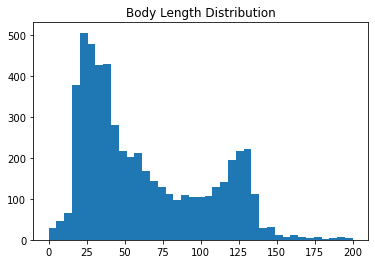

In [30]:
#Visualizing the length of the messages 
import matplotlib.pyplot as plt
import numpy as np 

bins = np.linspace(0,200,40)
plt.hist(dataset["body_len"] , bins)
plt.title("Body Length Distribution")
plt.show()

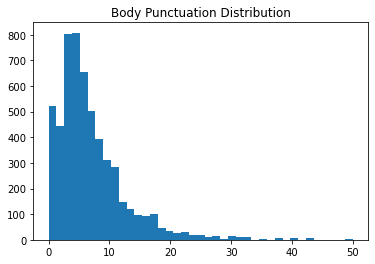

In [31]:
#Visualizing the percentage of punctuations of the messages 

bins = np.linspace(0,50,40)
plt.hist(dataset["punct%"] , bins)
plt.title("Body Punctuation Distribution")
plt.show()

In [32]:
import nltk 
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
email_data = pd.read_csv("SMSSpamCollection.tsv" , sep="\t" , header=None)
email_data.columns = ["output" , "email_message"]
email_data

,output,email_message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...
5564,ham,Will ü b going to esplanade fr home?
5565,ham,"Pity, * was in mood for that. So...any other s..."
5566,ham,The guy did some bitching but I acted like i'd...


In [34]:
email_data.iloc[5563].email_message

'This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.'

In [35]:

def count_punct(text):
    punct = sum([1 for i in text if i in string.punctuation])
    return round(punct/(len(text) - text.count(" ")),3) * 100

email_data["body_len"] = email_data["email_message"].apply(lambda x:(len(x) - x.count(" ")))
email_data["punct%"] = email_data["email_message"].apply(lambda x:count_punct(x))
email_data

,output,email_message,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
...,...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...,131,6.1
5564,ham,Will ü b going to esplanade fr home?,29,3.4
5565,ham,"Pity, * was in mood for that. So...any other s...",48,14.6
5566,ham,The guy did some bitching but I acted like i'd...,100,1.0


In [36]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W' , text)
    text = [pr_stem.stem(word) for word in tokens if word not in stopwords]
    return text

tfid_vect = TfidfVectorizer(analyzer=clean_text)
x_tfid = tfid_vect.fit_transform(email_data["email_message"])


In [37]:
x_tfid

<5568x8107 sparse matrix of type '<class 'numpy.float64'>'
	with 50971 stored elements in Compressed Sparse Row format>

In [38]:
x_features = pd.concat([dataset["body_len"] , dataset["punct%"] , pd.DataFrame(x_tfid.toarray())] , axis=1)
x_features

,body_len,punct%,0,1,2,3,4,5,6,7,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,160,2.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,128,4.7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,49,4.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,62,3.2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,28,7.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,131,6.1,0.093604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5564,29,3.4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.335215,0.0,0.0
5565,48,14.6,0.148439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5566,100,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [39]:
#Creating our Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold , cross_val_score

rfc = RandomForestClassifier(n_jobs=1)
k_fold = KFold(n_splits=5)

cross_val_score(rfc , x_features , email_data["output"] , cv=k_fold , scoring="accuracy" , n_jobs=1)

C:\Users\gokul\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\gokul\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\gokul\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\gokul\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\gokul\anaconda3\lib

array([0.97396768, 0.97935368, 0.97396768, 0.96495957, 0.97663971])

In [40]:
# dataset2 = pd.read_csv("SMSSpamCollection.tsv" , sep="\t" , header=None)
# dataset2.columns = ["label","body_text"]
# dataset2["body_len"] = dataset2["body_text"].apply(lambda x:(len(x) - x.count(" ")))
# dataset2["punct%"] = dataset2["body_text"].apply(lambda x:count_punct(x))
# dataset2
# x = dataset2.drop(columns=["label"])
# y = dataset2["label"]
# rf.fit(x,y)
# predictions = rf.predict([["Hi ramesh can you give me the notebook tomorrow"]])
# predictions

In [63]:
from sklearn.model_selection import train_test_split
import joblib
X_train,X_test,y_train,y_test = train_test_split(x_tfid,email_data['output'],test_size=0.20)

tfid_vect.get_feature_names()
rfc.fit(X_train,y_train)
# rfc = joblib.load("spam-model-final.joblib")
y_pred = rfc.predict(X_test)
y_pred

C:\Users\gokul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [ ]:
X_test

In [ ]:
y_pred

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       954
        spam       1.00      0.81      0.89       160

    accuracy                           0.97      1114
   macro avg       0.98      0.90      0.94      1114
weighted avg       0.97      0.97      0.97      1114



C:\Users\gokul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


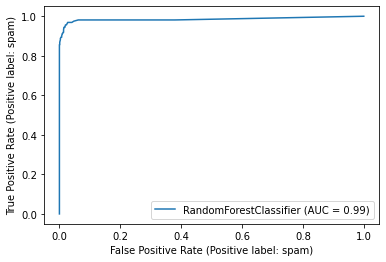

In [65]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc,X_test,y_test)

In [ ]:
# k_fold = KFold(n_splits=5)

# cross_val_score(rf , x_features , dataset["label"] , cv=k_fold , scoring="accuracy" , n_jobs=1)

In [ ]:
inputsm = ["This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."]
data = tfid_vect.transform(inputsm)
# tfid_vect.get_feature_names()
print(pd.DataFrame(data.toarray()))

In [ ]:
predictions = rfc.predict(data)
predictions